In [17]:
import json

with open('aapl6m.json') as hist_price_json:
    data = json.load(hist_price_json)
    hist_price = [p['close'] for p in data]


In [18]:
hist_price

[216.1951,
 216.5523,
 216.6813,
 218.3285,
 215.9768,
 219.0826,
 220.4718,
 218.7155,
 223.2104,
 223.9943,
 225.5026,
 227.5069,
 230.2754,
 226.2269,
 222.5555,
 222.0396,
 225.1156,
 214.6869,
 212.7916,
 220.3924,
 215.6791,
 220.4321,
 219.4795,
 214.3495,
 217.614,
 218.9437,
 221.0076,
 213.4267,
 218.1003,
 214.6273,
 210.5987,
 211.6505,
 217.1675,
 220.5015,
 205.8755,
 200.0311,
 202.1942,
 208.3264,
 207.5995,
 203.5967,
 193.3407,
 191.409,
 186.0022,
 190.5925,
 192.7034,
 185.0662,
 176.2241,
 176.025,
 171.5541,
 173.8742,
 173.4958,
 180.1672,
 178.7831,
 177.8173,
 184.0306,
 175.9354,
 173.9738,
 167.7704,
 168.8756,
 167.9098,
 168.3778,
 170.2199,
 164.7732,
 163.2398,
 165.3607,
 160.2028,
 156.1602,
 150.0862,
 146.2029,
 156.4987,
 155.4831,
 155.5627,
 157.0663,
 157.2455,
 141.5827,
 147.6268,
 147.2982,
 150.1061,
 152.6552,
 153.1431,
 151.6396,
 149.3594,
 152.4162,
 154.2783,
 155.1943,
 156.1502,
 152.6453,
 153.2626,
 152.0478,
 157.0862,
 155.6324,
 1

(array([ 1.,  6.,  9., 10.,  2.,  7., 16., 18.,  5.,  4., 10.,  7.,  3.,
         3.,  2.,  3., 10., 13.,  6.,  3.]),
 array([141.5827  , 146.017335, 150.45197 , 154.886605, 159.32124 ,
        163.755875, 168.19051 , 172.625145, 177.05978 , 181.494415,
        185.92905 , 190.363685, 194.79832 , 199.232955, 203.66759 ,
        208.102225, 212.53686 , 216.971495, 221.40613 , 225.840765,
        230.2754  ]),
 <a list of 20 Patch objects>)

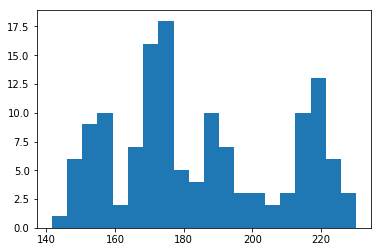

In [19]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

plt.hist(hist_price, 20)

In [20]:
# fit log normal distribution
import numpy as np
from scipy.stats import lognorm

estimated_sigma, loc, scale = lognorm.fit(hist_price)

print(estimated_sigma)
print(scale)
print(loc)

0.29656455479292676
79.29017943599274
101.55871117243439


In [21]:
rand_data = lognorm.rvs(estimated_sigma, loc, scale, size=130)

rand_data = [x for x in rand_data if x > 68 and x < 250]


In [22]:
np.exp(estimated_sigma)

1.3452293981995502

(array([ 3.,  6.,  4., 10., 12., 12., 10.,  8., 11.,  9.,  8., 10.,  3.,
         5.,  3.,  1.,  4.,  3.,  1.,  2.]),
 array([144.04081683, 148.8064641 , 153.57211137, 158.33775863,
        163.1034059 , 167.86905316, 172.63470043, 177.40034769,
        182.16599496, 186.93164222, 191.69728949, 196.46293675,
        201.22858402, 205.99423128, 210.75987855, 215.52552581,
        220.29117308, 225.05682034, 229.82246761, 234.58811487,
        239.35376214]),
 <a list of 20 Patch objects>)

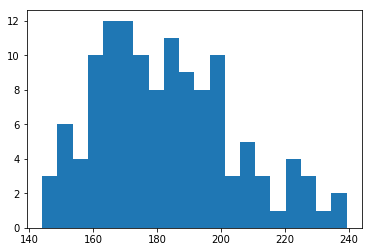

In [23]:
plt.hist(rand_data, 20)

([array([ 2.,  3.,  6.,  9., 10., 14.,  7., 11., 12., 10.,  7., 10.,  4.,
          6.,  3.,  1.,  4.,  3.,  1.,  2.]),
  array([ 2.,  5., 15.,  5.,  6., 13., 19.,  8.,  5., 10.,  9.,  2.,  2.,
          3.,  7., 13.,  9.,  4.,  1.,  0.])],
 array([141.5827    , 146.47125311, 151.35980621, 156.24835932,
        161.13691243, 166.02546553, 170.91401864, 175.80257175,
        180.69112485, 185.57967796, 190.46823107, 195.35678418,
        200.24533728, 205.13389039, 210.0224435 , 214.9109966 ,
        219.79954971, 224.68810282, 229.57665592, 234.46520903,
        239.35376214]),
 <a list of 2 Lists of Patches objects>)

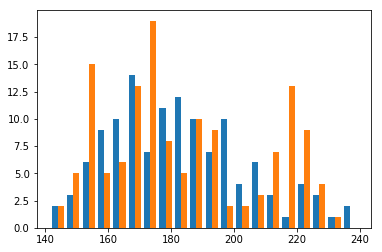

In [24]:
plt.hist([rand_data, hist_price], 20)

In [25]:
import  math
from scipy.stats import norm

def cdf(z, mu=0.0, sigma=1.0):
    return norm.cdf(z, mu, sigma)

def get_bs_call_price(s, x, r, sigma, t):
    a = (math.log(s/x) + (r+sigma*sigma/2.0)*t) / (sigma * math.sqrt(t))
    b = a - sigma*math.sqrt(t)
    return s*cdf(a) - x*math.exp(-r*t)*cdf(b)

In [33]:
get_bs_call_price(196, 200, 0.025, 0.2, 0.01)

0.3313487460586444

In [27]:
get_bs_call_price(196, 200, 0.025, 0.2, 0.5)

10.35026572078145

In [28]:
# find implied valolity


In [29]:
np.exp(0.2)

1.2214027581601699